In [1]:
# Call the relevant python packages

%matplotlib notebook

import numpy as np
import pandas as pd
import glob, os
import nway

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Fits Files

In [17]:
# Open a fits file and display info
fits_im = fits.open('COSMOS_XMM.fits')
fits_im.info()

# Print data
data = fits_im[1].data
print(data)

Filename: COSMOS_XMM.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (542,)   uint8   
  1  XMM           1 BinTableHDU     21   1797R x 4C   [J, D, D, E]   
[(    1, 150.1051483, 1.9808168, 0.91)
 (    2, 149.7391899, 2.2205331, 0.93)
 (    3, 149.7615427, 2.3184922, 0.9 ) ...
 (70228, 149.5606277, 2.1814007, 1.75)
 (70247, 150.1019338, 1.7366099, 1.75)
 (70250, 150.1001239, 2.200092 , 1.75)]


In [25]:
# Print fits header fields
hdr = fits_im[0].header
hdr

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                  542 / Number of characters                           
EXTEND  =                    T / There are standard extensions                  
VOTMETA =                    T / Table metadata in VOTable format               
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

# Catalogue Operations

In [4]:
# Read in the background files
file_36 = 'MAG_S1_0.csv'
data_36 = ascii.read(file_36, data_start=1)

file_45 = 'MAG_S2_0.csv'
data_45 = ascii.read(file_45, data_start=1)

In [13]:
# Define function to produce 3D graph
def graph(file,filtr,epoch,var):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    #plt.rc("xtick", labelsize=8)
    #plt.rc("ytick", labelsize=8)
    plt.rc("axes", labelsize=10)
    plt.rc("legend", fontsize=11)
    plt.figure(figsize=(6,6))
    #ax = plt.gca()                        # Sets up active plot region
    ax = plt.axes(projection='3d')
    
    # Make the actual plot
    data = ascii.read(file, data_start=1)
    ax.plot3D(data_36['RA'], data['DEC'], data[var], '.', color='black', ms=0.5, label="M32 All")
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    ax.set_zlabel(var)
    #plt.xlabel('RA', size=18)
    #plt.ylabel('DEC', size=18)
    #plt.zlabel(var, size=18)
    #plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    #plt.title(filtr+'-'+epoch,fontsize=18)
    
    # Plot a box
    #x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    #x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    #x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    #x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    #plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
    
    #plt.savefig("blah.pdf", bbox_inches='tight')
    #plt.tight_layout()
    #plt.show()
    #plt.close()

<IPython.core.display.Javascript object>


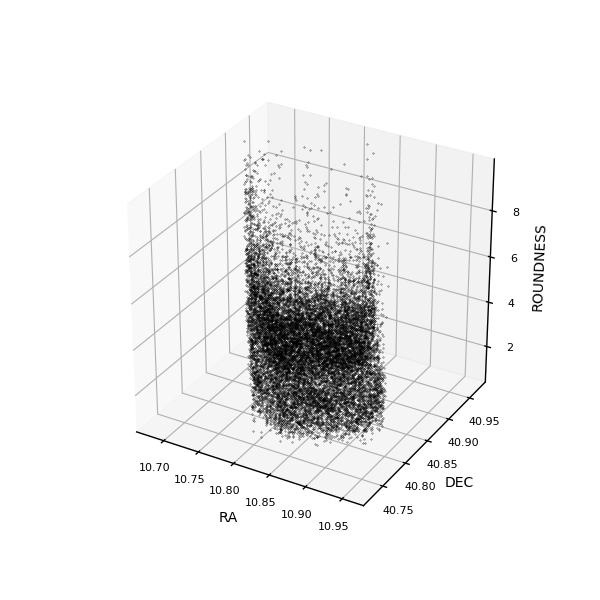

<IPython.core.display.Javascript object>


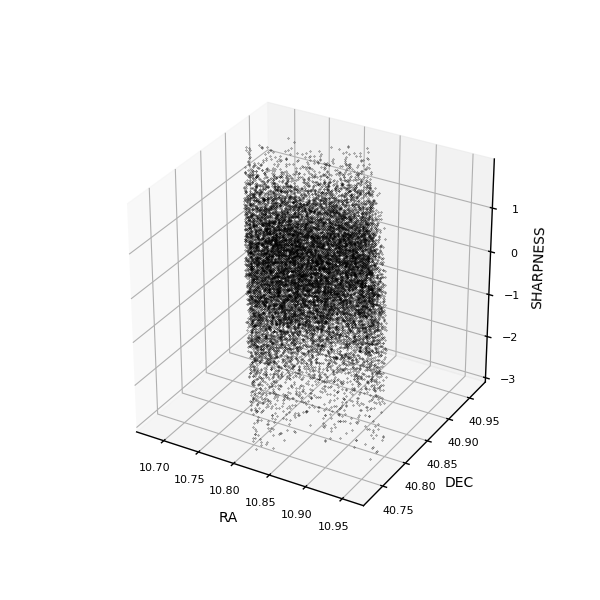

<IPython.core.display.Javascript object>


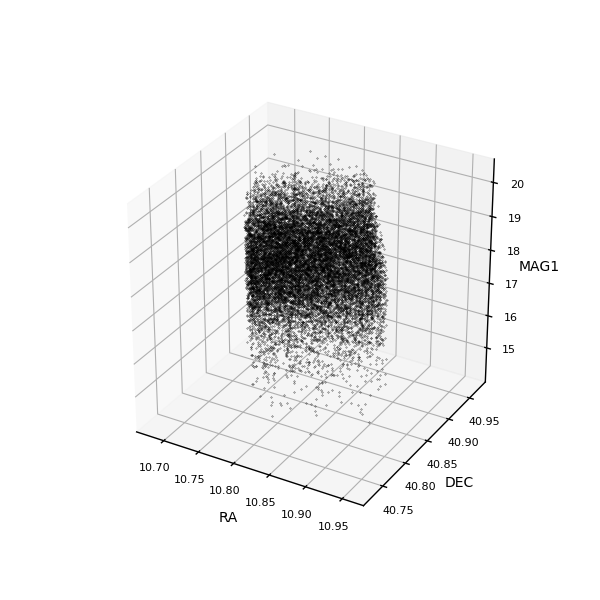

<IPython.core.display.Javascript object>


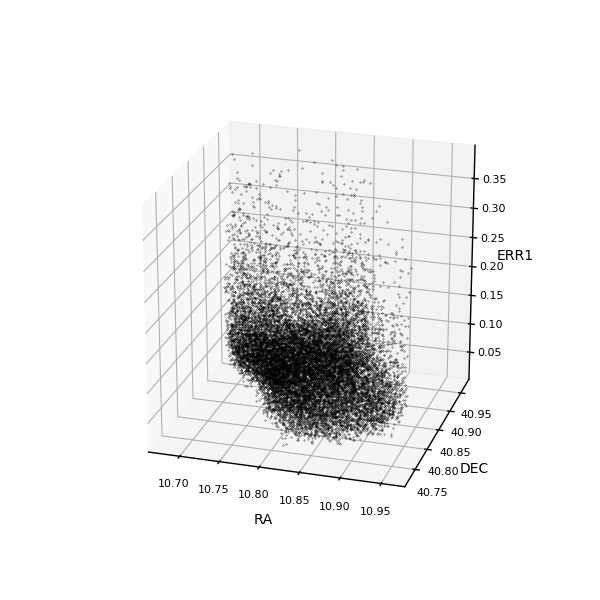

In [14]:
graph(file_36,'36','background','ROUNDNESS')
graph(file_36,'36','background','SHARPNESS')
graph(file_36,'36','background','MAG1')
graph(file_36,'36','background','ERR1')

In [17]:
#data_36.show_in_notebook()

file_36_1 = 'MAG_S1_1.csv'
data_36_1 = ascii.read(file_36_1, data_start=1)
print(len(data_36_1['RA']))
print(len(data_36_1['DEC']))

12086
12086


In [18]:
graph(file_36_1,'36','1','ROUNDNESS')
graph(file_36_1,'36','1','SHARPNESS')
graph(file_36_1,'36','1','MAG1')
graph(file_36_1,'36','1','ERR1')

<IPython.core.display.Javascript object>

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (12086,) and requested shape (16488,)

In [34]:
# Define function to produce location plot
def loc_plot(file,filtr,epoch):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=11)
    plt.figure(figsize=(9,9))
    ax = plt.gca()                        # Sets up active plot region
    
    # Make the actual plot
    data = ascii.read(file, data_start=1)
    plt.plot(data_36['RA'], data['DEC'], '.', color='black', ms=0.2, label="M32 All")    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(filtr+'-'+epoch,fontsize=18)
    
    # Plot a box
    #x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    #x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    #x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    #x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    #plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
    
    #plt.savefig("blah.pdf", bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.close()

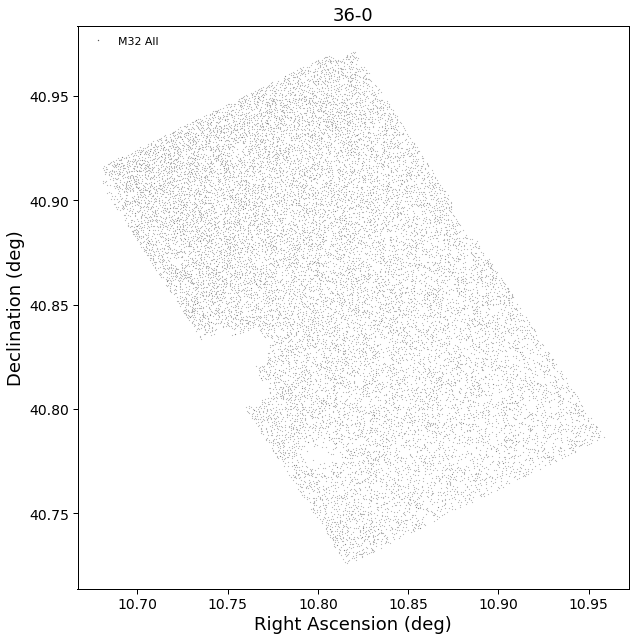

In [35]:
# Show location plot of background 36 field
loc_plot('MAG_S1_0.csv','36','0')

In [27]:
#print column names
data_36.colnames

['RA', 'DEC', 'ROUNDESS', 'SHARPNESS', 'MAG1', 'ERR1']